# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split

os.getcwd()
os.chdir("/Users/vymo/Documents/Projects/GreatLakes/PGP-ML/lab/pgp-aiml-ml-chennai-residency2-externallab-spd-git")

In [2]:
df = pd.read_csv("petrol.csv")  
df.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.dtypes

tax             float64
 income           int64
 highway          int64
 dl             float64
 consumption      int64
dtype: object

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.dtypes

tax            float64
income           int64
highway          int64
dl             float64
consumption      int64
dtype: object

In [5]:
df.isnull().any()

tax            False
income         False
highway        False
dl             False
consumption    False
dtype: bool

In [6]:
df.isna().any()

tax            False
income         False
highway        False
dl             False
consumption    False
dtype: bool

In [7]:
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

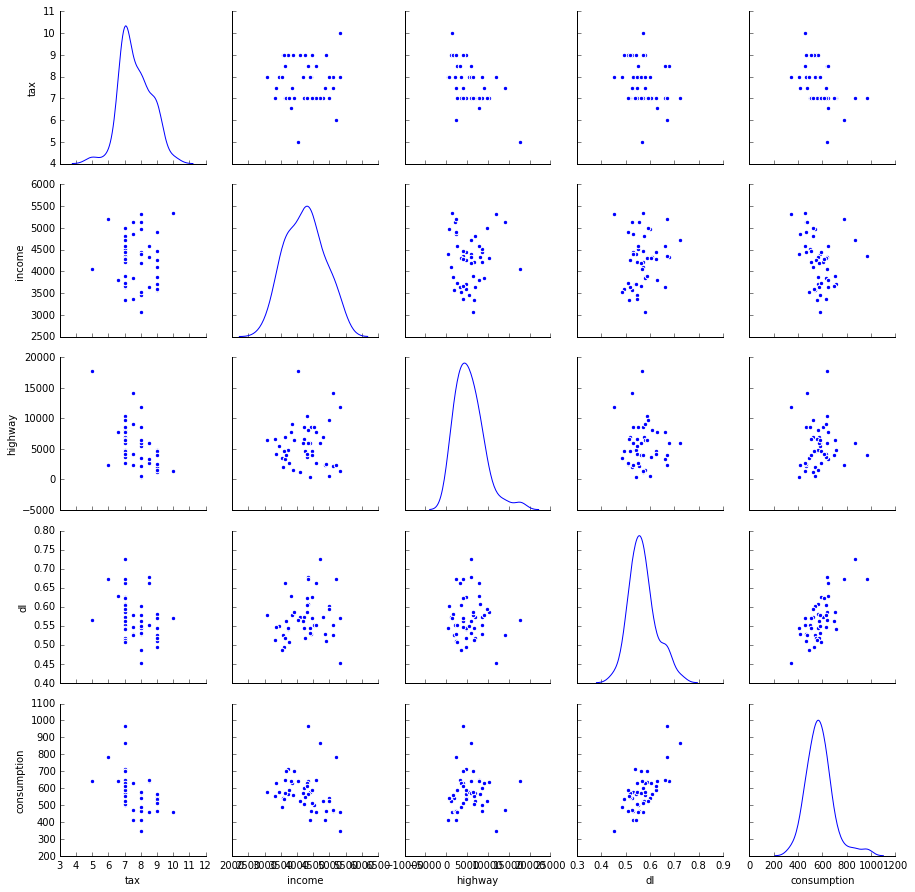

In [8]:
sns.pairplot(df, diag_kind='kde')

In [9]:
df.quantile([0.25,0.5,0.75])

,tax,income,highway,dl,consumption
0.25,7.000,3739.00,3110.25,0.52975,509.50
0.50,7.500,4298.00,4735.50,0.56450,568.50
0.75,8.125,4578.75,7156.00,0.59525,632.75


In [10]:
p75 = df.quantile(0.75)
p25 = df.quantile(0.25)
df_iqr = p75 - p25
mini = p25 - 1.5*df_iqr
maxi = p75 + 1.5*df_iqr

In [11]:
filtered_df = df[(df > mini) & (df < maxi)].dropna()
filtered_df.describe()

,tax,income,highway,dl,consumption
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,7.711163,4186.837209,5209.744186,0.565535,564.744186
std,0.829932,557.816403,2773.890659,0.050616,86.805775
min,6.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3719.500000,2946.500000,0.529500,517.000000
50%,7.500000,4258.000000,4725.000000,0.563000,566.000000
75%,8.250000,4494.000000,6917.500000,0.589500,629.500000
max,9.000000,5319.000000,11868.000000,0.677000,782.000000


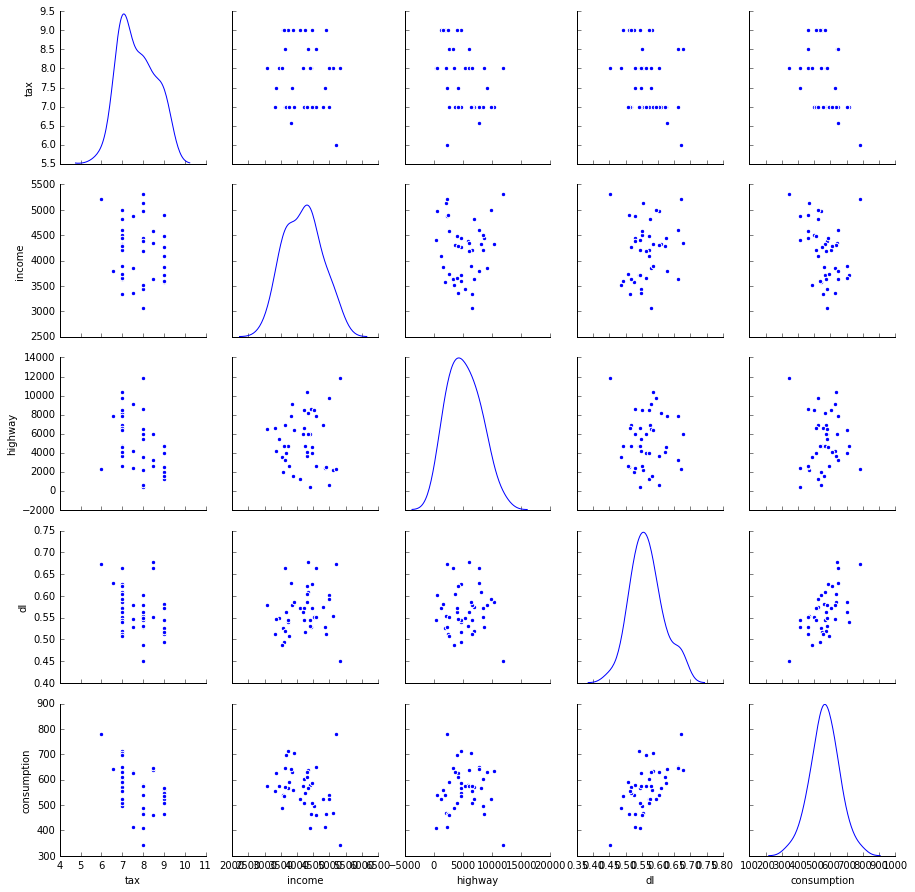

In [12]:
sns.pairplot(filtered_df, diag_kind='kde')

In [ ]:
# In the above to sns kde plots, we can clearly see that the outliers 
# have been removed and many varibles give a closer to a normal distributed curve

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [13]:
df.corr() # Original df with the outliers

,tax,income,highway,dl,consumption
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highway,-0.522130,0.050163,1.000000,-0.064129,0.019042
dl,-0.288037,0.157070,-0.064129,1.000000,0.698965
consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [14]:
filtered_df.corr() # Filtered df with the outliers removed

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [15]:
# Since Q8 asks to ADD the features 'income' and 'highway', I have dropped these in this Question
X = df.drop(['income','highway','consumption'],axis=1) # Original df with the outliers
X.head(5)

,tax,dl
0,9.0,0.525
1,9.0,0.572
2,9.0,0.580
3,7.5,0.529
4,8.0,0.544


In [16]:
y = df[['consumption']]
y.head(5)

,consumption
0,541
1,524
2,561
3,414
4,410


In [17]:
Xf = filtered_df.drop(['income','highway','consumption'],axis=1) # Filtered df without the outliers
yf = filtered_df[['consumption']] 

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [19]:
X_train.shape

(38, 2)

In [20]:
X_test.shape

(10, 2)

In [21]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.20 , random_state=1)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [22]:
regression_model = LinearRegression() # Original df with the outliers
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pd.DataFrame(regression_model.coef_[0],X_train.columns)

,0
tax,-35.846692
dl,1250.743596


In [24]:
regression_model_filtereddf = LinearRegression() # Filtered df with the outliers removedx
regression_model_filtereddf.fit(Xf_train, yf_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [25]:
regression_model.score(X_test,y_test) # Original df with the outliers

0.5904039469252051

In [26]:
regression_model_filtereddf.score(Xf_test,yf_test)  # Filtered df without the outliers. Though the score is lower,
                                                    # addition of features might increase the score

0.2876056314158515

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [27]:
X = df.drop(['consumption'],axis=1)
X.head(5)

,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [28]:
# Original df with the outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test,y_test)

0.6611179509319676

In [29]:
Xf = filtered_df.drop(['consumption'],axis=1)
yf = filtered_df[['consumption']] 

In [30]:
# Filtered df without the outliers. As the features are added, the performance of this model increases drastically
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.20 , random_state=1)
regression_model_filtereddf = LinearRegression()
regression_model_filtereddf.fit(Xf_train, yf_train)
regression_model_filtereddf.score(Xf_test,yf_test)

0.6930212207091808

# Question 9: Print the coefficients of the multilinear regression model

In [31]:
pd.DataFrame(regression_model.coef_[0],X_train.columns) # Original df with the outliers

,0
tax,-32.003954
income,-0.075188
highway,-0.002137
dl,1355.827606


In [32]:
pd.DataFrame(regression_model_filtereddf.coef_[0],Xf_train.columns) # Filtered df without the outliers

,0
tax,-39.411584
income,-0.062628
highway,-0.003022
dl,950.882744


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

Considering the following regression model:

yi = B0 + (B1)(x1)i +⋯+ (Bk)(xk)i,

The 𝑅2 represents the proportion of the variance that is captured by (k) variables

𝑅2=𝐸𝑆𝑆/𝑇𝑆𝑆, where ESS and TSS stand respectively for Explained Sum of Squares and Total Sum of Squares.)

Regression minimizes the sum of squared errors. Thus, on increasing the value of (k), coef are evaluated such that, TSS reduces, or equivalently, for the values of the coefficients such that the 𝑅2, is maximized

Thus, when you add a variable to your model, the value of its estimated coefficient (B0, B1 etc) can either be zero, in which case the proportion of explained variance (𝑅2) stays unchanged, or takes a nonzero value because it improves the quality of the fit. So the 𝑅2 value cannot be smaller after adding a variable.